In [63]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd, base64, io, numpy as np
from ipywidgets import interact
%matplotlib inline
connection = sqlite3.connect('../database.db')

In [46]:
def displayGraph(df, yRange, title, metric):
    plt.figure(figsize=(18,8))
    plt.rc('font',size=14)
    plt.plot(df["label"],df[metric],marker='o')
    plt.title(title,fontsize=16)
    plt.ylabel(metric.title())
    plt.grid(linewidth=0.25, color='black')
    plt.yticks(yRange)
    plt.xticks(rotation=30, ha='right')
    for i, acc in enumerate(df[metric]):
        plt.annotate(f'{acc:.2f}', (i, acc), textcoords='offset points', xytext=(0,10), ha='center',fontsize=12)
    plt.show()

def displayImage(row, image_data):
    decoded_image = io.BytesIO(base64.b64decode(row[image_data]))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"{row['architecture']} ({row['configuration_id']})", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

# Best Results

## Best accuracies

In [47]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id || ')' as label, nb.accuracy
    FROM notebook AS nb
    WHERE nb.accuracy >= .6
    ORDER BY nb.accuracy
""", connection)
df

,label,accuracy
0,ConvNeXt (12),0.716963
1,Xception (18),0.801014
2,Xception (2),0.804552
3,ConvNeXt (7),0.823580
4,Xception (16),0.823867
5,Xception (19),0.829222
6,ResNetV2 (18),0.842991
7,ResNetV2 (7),0.844234
8,ResNetV2 (22),0.849111
9,ConvNeXt (20),0.854179


33 models with accuracy >= 60%

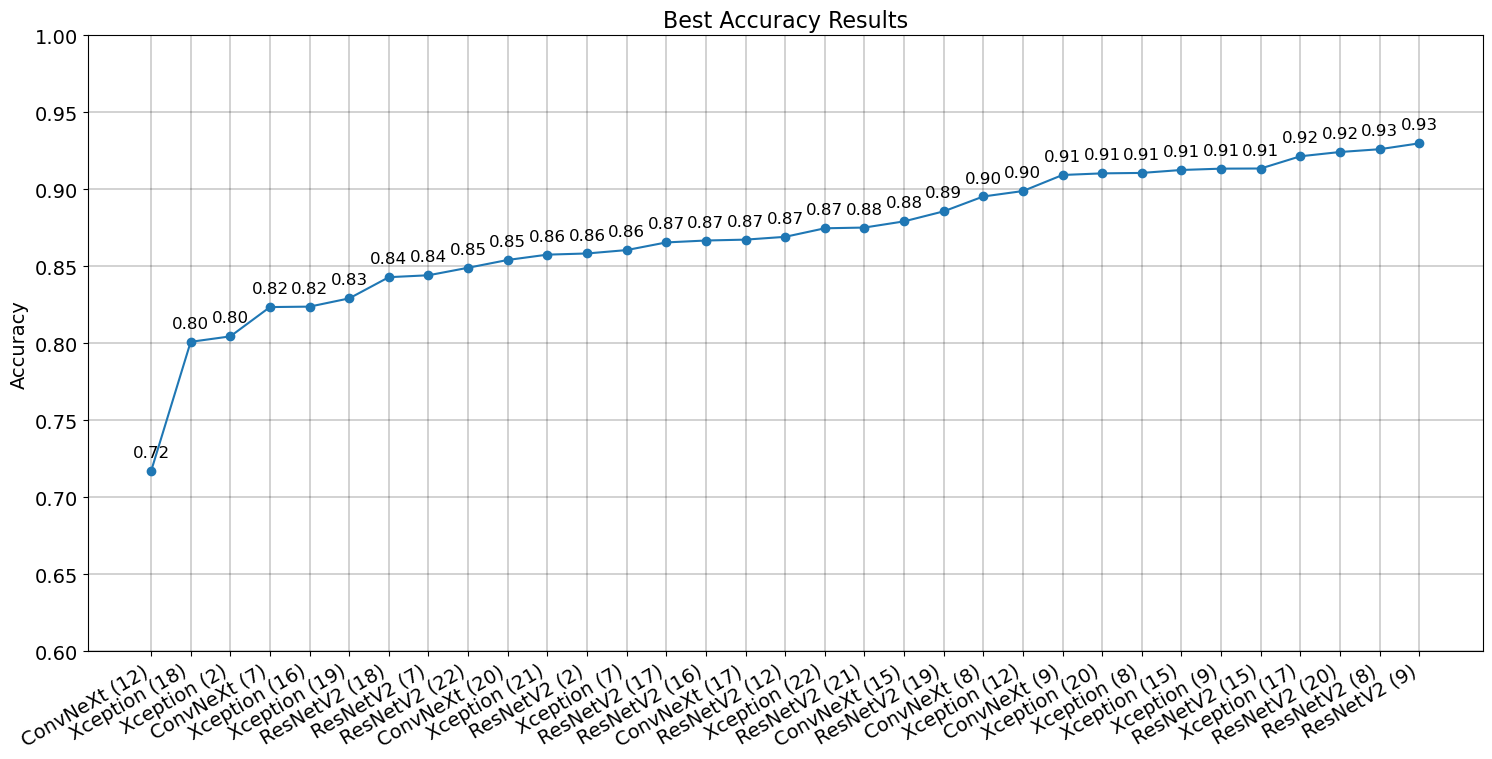

In [48]:
displayGraph(df, np.arange(.6, 1.01, .05), "Best Accuracy Results", "accuracy")

In [50]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id,nb.architecture,nb.loss,nb.accuracy,nb."precision",nb.recall,nb.auc
    FROM notebook AS nb
    WHERE nb.configuration_id IN (8,9,15,17,20)
    ORDER BY nb.architecture;
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc
0,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296
1,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011
2,15,ConvNeXt,15.374818,0.879231,0.807229,0.807229,0.892624
3,17,ConvNeXt,10.778628,0.867374,0.821285,0.821285,0.903145
4,20,ConvNeXt,14.179653,0.854179,0.792503,0.792503,0.886232
5,8,ResNetV2,478.226196,0.926085,0.748996,0.748996,0.853609
6,9,ResNetV2,569.494934,0.929910,0.761714,0.761714,0.861363
7,15,ResNetV2,829.412537,0.913559,0.706158,0.706158,0.829242
8,17,ResNetV2,1025.127563,0.865557,0.544177,0.544177,0.734402
9,20,ResNetV2,774.975342,0.924268,0.739625,0.739625,0.848141


Best configurations identifiers:

ConvNext = 8 (due to better precision, recall, auc and loss compared to id 9, which has only better accuracy)

ResNetV2 = 9 ?

Xception = 17 ?

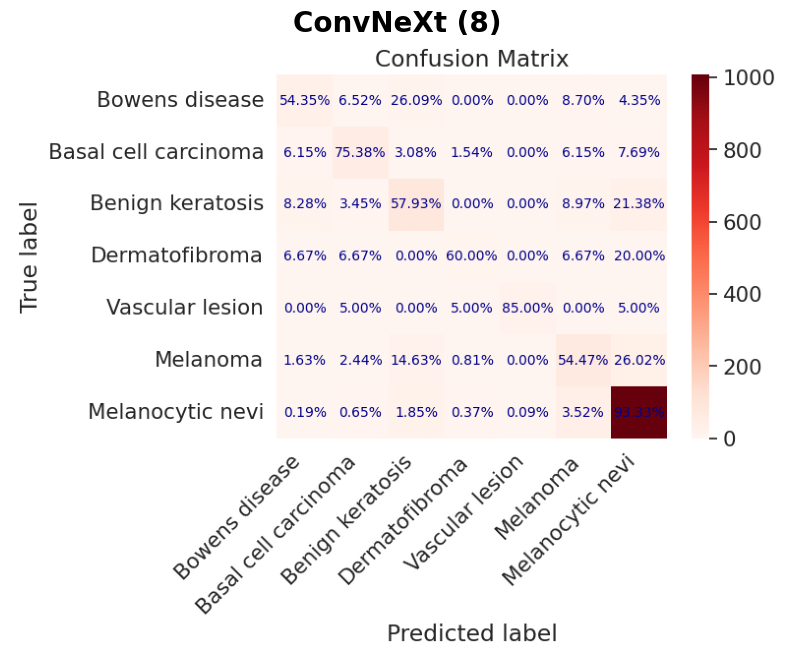

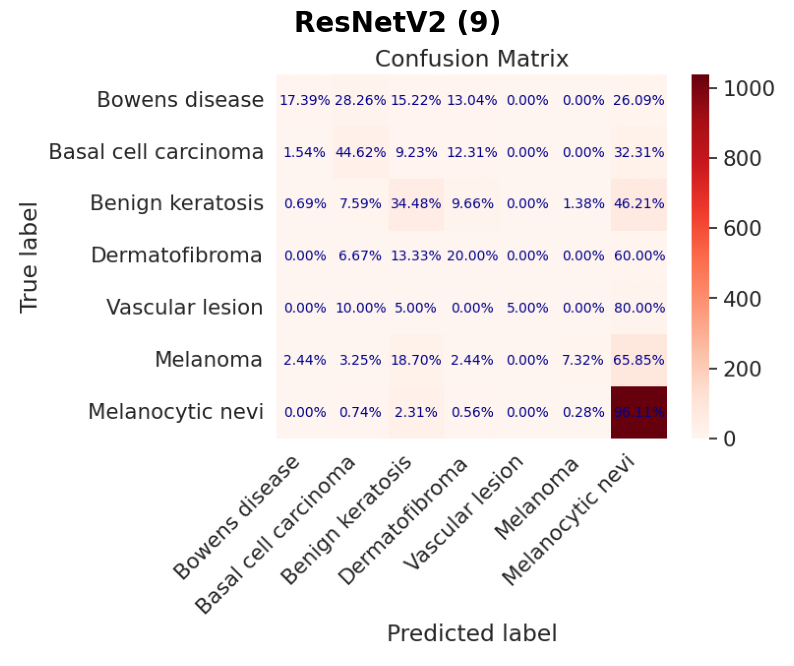

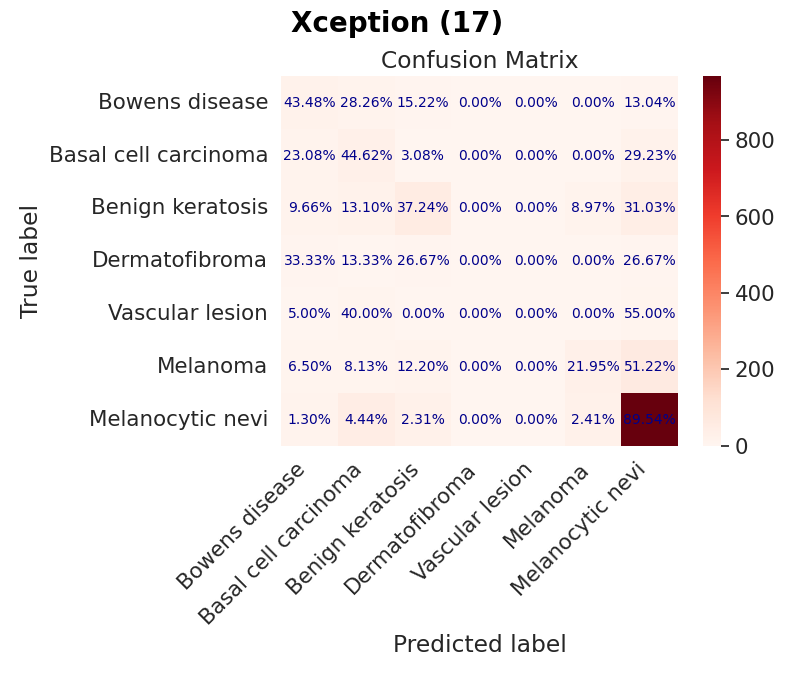

In [51]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix, nb.configuration_id, nb.architecture
    FROM notebook AS nb
    WHERE nb.configuration_id = 8 AND nb.architecture = 'ConvNeXt' OR nb.configuration_id = 9 AND nb.architecture = 'ResNetV2' OR nb.configuration_id = 17 AND nb.architecture = 'Xception'
""", connection)
for id,row in df.iterrows():
    displayImage(row, 'confusion_matrix')

In [52]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id || ')' as label, nb.recall
    FROM notebook AS nb
    WHERE nb.recall in (select recall from notebook order by recall desc limit 10)
    ORDER BY nb.recall DESC
""", connection)
df

,label,recall
0,ConvNeXt (8),0.842704
1,ConvNeXt (17),0.821285
2,ConvNeXt (1),0.818608
3,ConvNeXt (11),0.817938
4,ConvNeXt (9),0.815261
5,ConvNeXt (7),0.808568
6,ConvNeXt (15),0.807229
7,ResNetV2 (19),0.801205
8,ConvNeXt (20),0.792503
9,ResNetV2 (21),0.787818


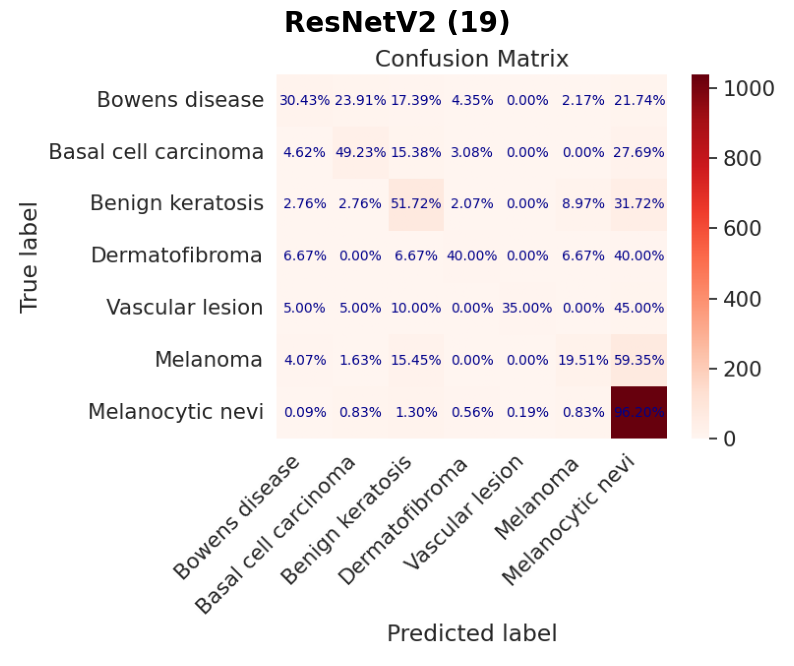

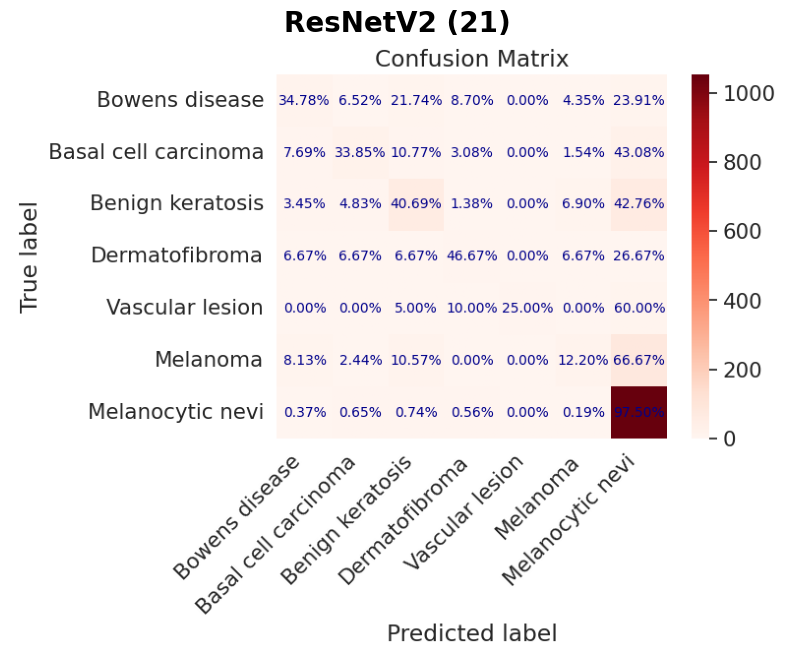

In [53]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix, nb.configuration_id, nb.architecture
    FROM notebook AS nb
    WHERE nb.configuration_id IN (19,21) AND nb.architecture = 'ResNetV2'
""", connection)
for id,row in df.iterrows():
    displayImage(row, 'confusion_matrix')

In [54]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.precision, nb.recall, nb.auc
        FROM notebook AS nb
        ORDER BY nb.""" + metric + " DESC", connection)
    return df
df = interact(query, metric = ['accuracy', 'precision', 'recall', 'auc'])
df

interactive(children=(Dropdown(description='metric', options=('accuracy', 'precision', 'recall', 'auc'), value…

<function __main__.query(metric='accuracy')>

In [55]:
def query(metric = 'precision'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.accuracy, met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
        FROM metrics as met JOIN notebook AS nb
        ON met.notebook_id = nb.id
        WHERE met.type = 'Melanoma'
        ORDER BY met.""" + metric + " DESC", connection)
    return df
df = interact(query, metric = ['f1_score', 'precision', 'recall', 'roc_auc', 'specificity'])
df

interactive(children=(Dropdown(description='metric', index=1, options=('f1_score', 'precision', 'recall', 'roc…

<function __main__.query(metric='precision')>

In [56]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id || ')' || ' - ' || met.type as label, met.recall
    FROM notebook AS nb JOIN metrics AS met ON met.notebook_id = nb.id
    WHERE met.recall in (select recall from metrics where type = 'Melanoma' order by recall desc limit 10)
    ORDER BY met.recall DESC
""", connection)
df

,label,recall
0,Xception (13) - Melanoma,0.707317
1,ResNetV2 (22) - Melanoma,0.609756
2,ResNetV2 (17) - Melanoma,0.577236
3,ConvNeXt (8) - Melanoma,0.544715
4,Xception (16) - Melanoma,0.544715
5,ConvNeXt (1) - Melanoma,0.528455
6,ConvNeXt (12) - Melanoma,0.528455
7,ConvNeXt (13) - Melanoma,0.528455
8,ConvNeXt (14) - Melanoma,0.504065
9,ConvNeXt (15) - Melanoma,0.504065


# Worst Results

In [57]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id || ')' as label, nb.accuracy
    FROM notebook AS nb
    WHERE nb.accuracy < .6
    ORDER BY nb.accuracy
""", connection)
df

,label,accuracy
0,ConvNeXt (1),0.000000
1,ConvNeXt (4),0.000000
2,ConvNeXt (5),0.000000
3,ConvNeXt (6),0.000000
4,ResNetV2 (6),0.000000
5,ConvNeXt (10),0.000000
6,ResNetV2 (10),0.000000
7,ConvNeXt (11),0.000000
8,ConvNeXt (13),0.000000
9,ConvNeXt (14),0.000000


32 models with accuracy < 60%

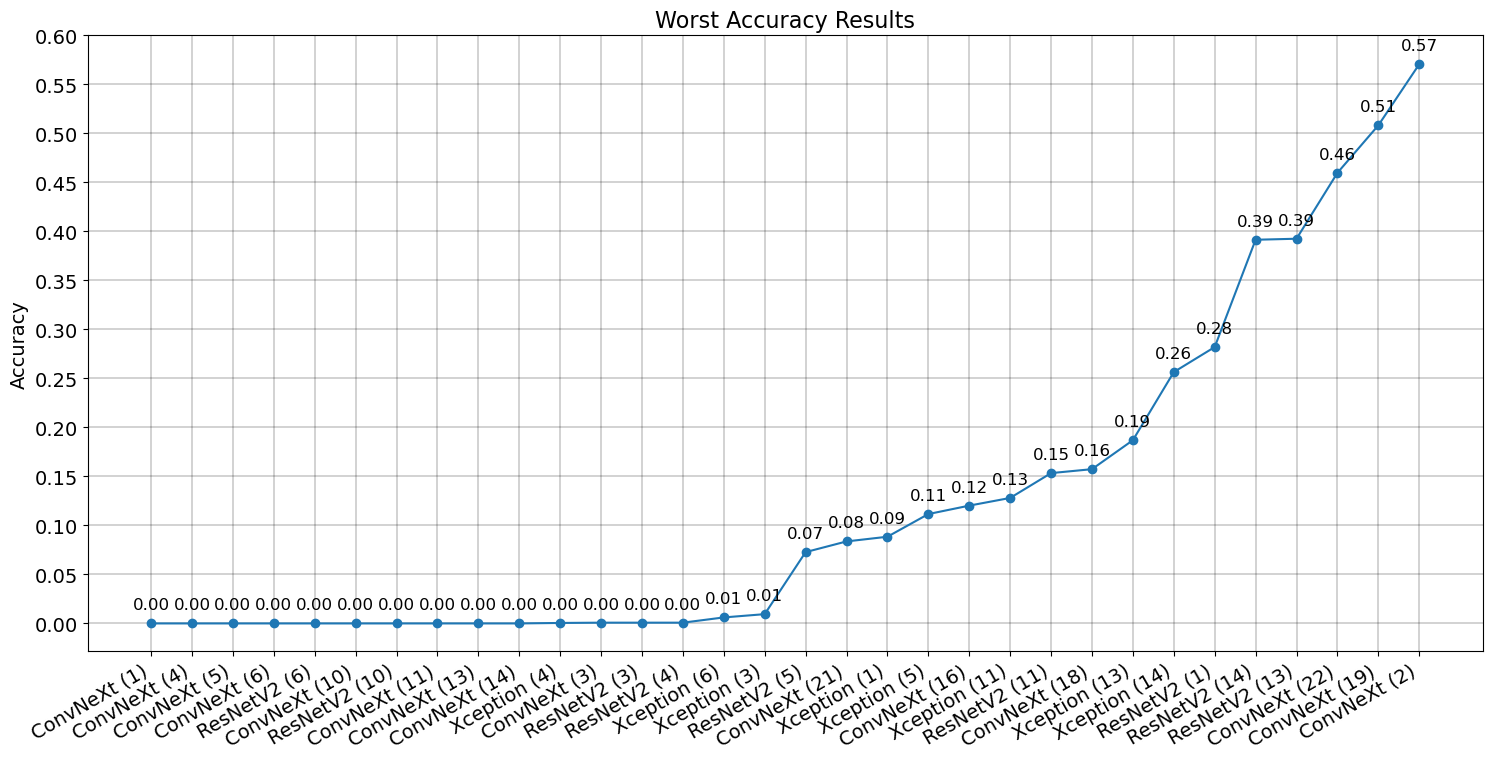

In [58]:
displayGraph(df, np.arange(0, .61, .05), "Worst Accuracy Results","accuracy")

Configurations with lowest accuracies: 1,3,4,5,6,10,11,13,14

1,10,11,13,14 - Utilization of custom optimizer (AdamW)

3,4,5,6 - Transfer learning false

Only 3,4,6 have all models with accuracy <= 1%

Xception 13 has the best recall for melanoma

In [59]:
df = pd.read_sql_query("""
    select * from configuration WHERE id in (3,4,6)
""", connection)
df

,id,transfer_learning,freeze_layers,balance_classes,segmentation,data_augmentation,normalization,custom_optimizer,callback
0,3,False,False,False,False,True,None,False,False
1,4,False,False,False,False,False,None,False,False
2,6,False,False,False,True,False,None,False,False


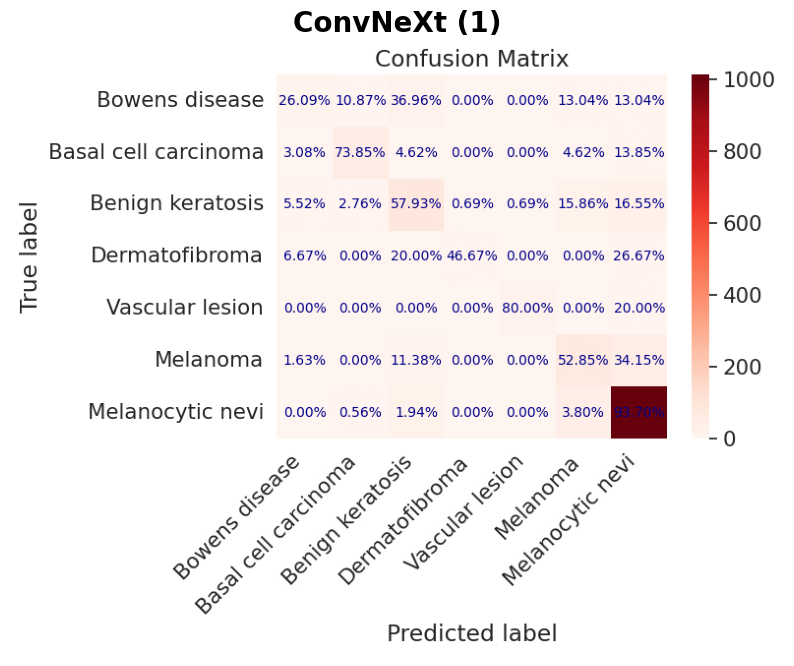

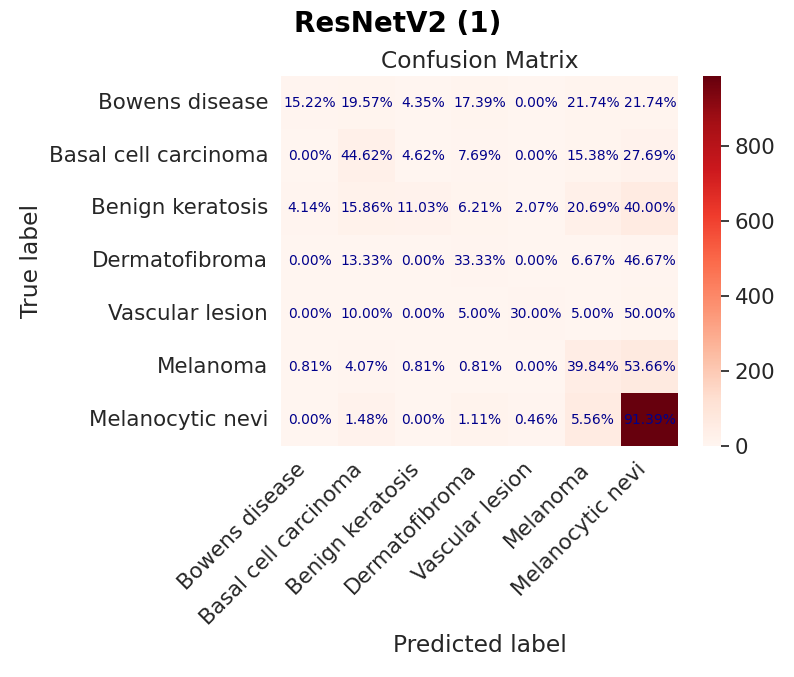

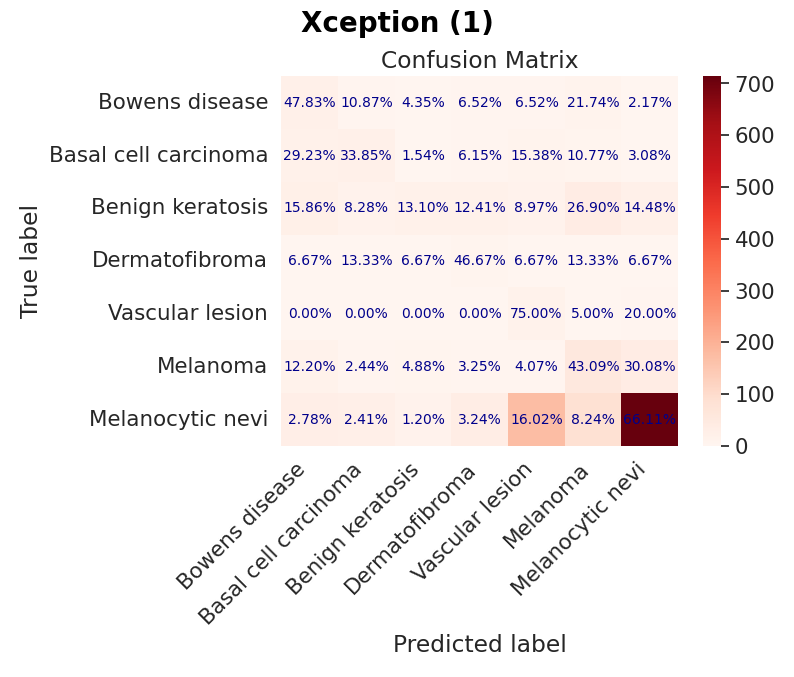

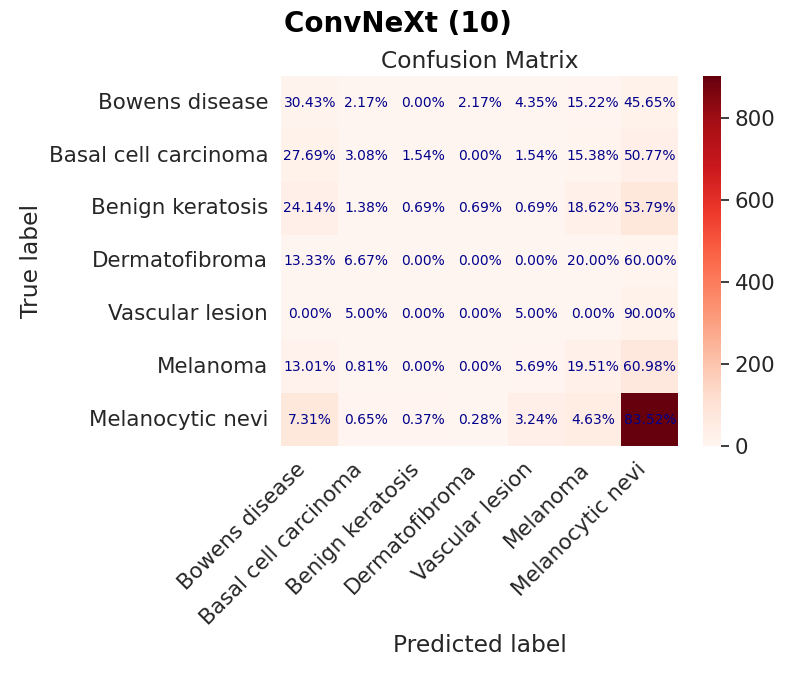

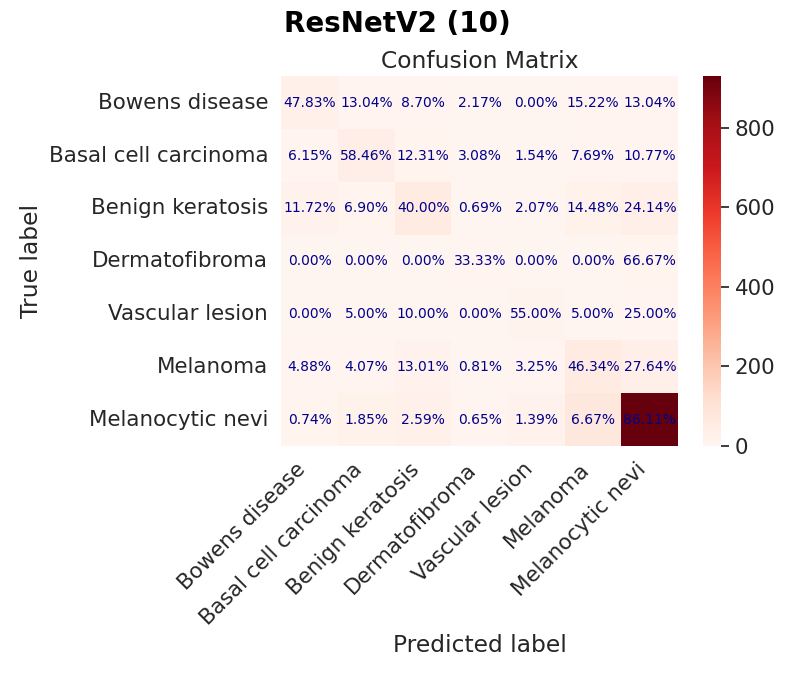

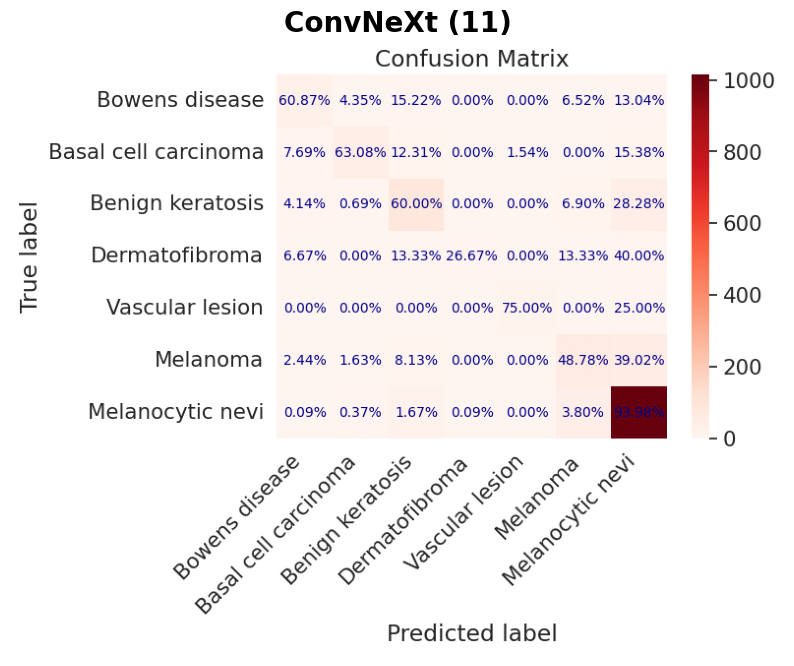

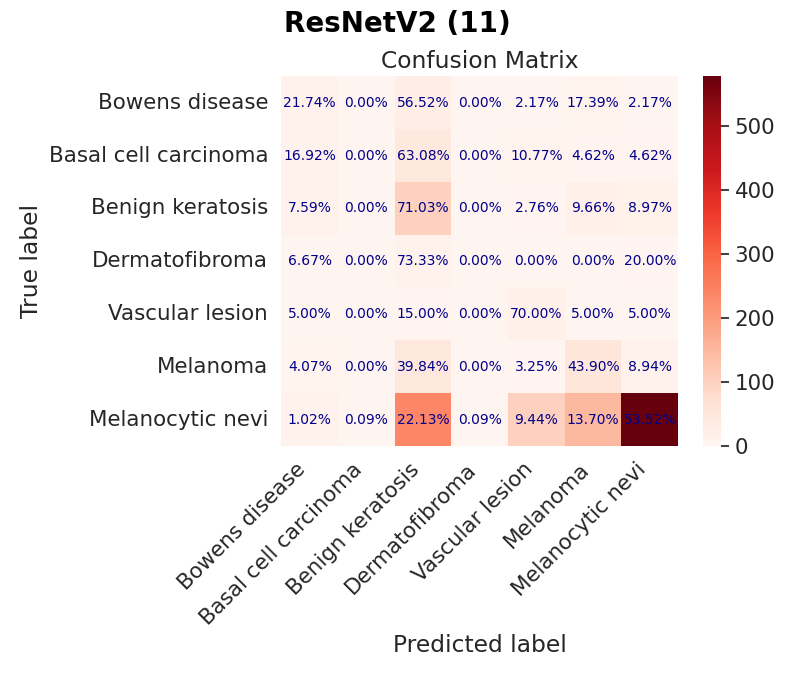

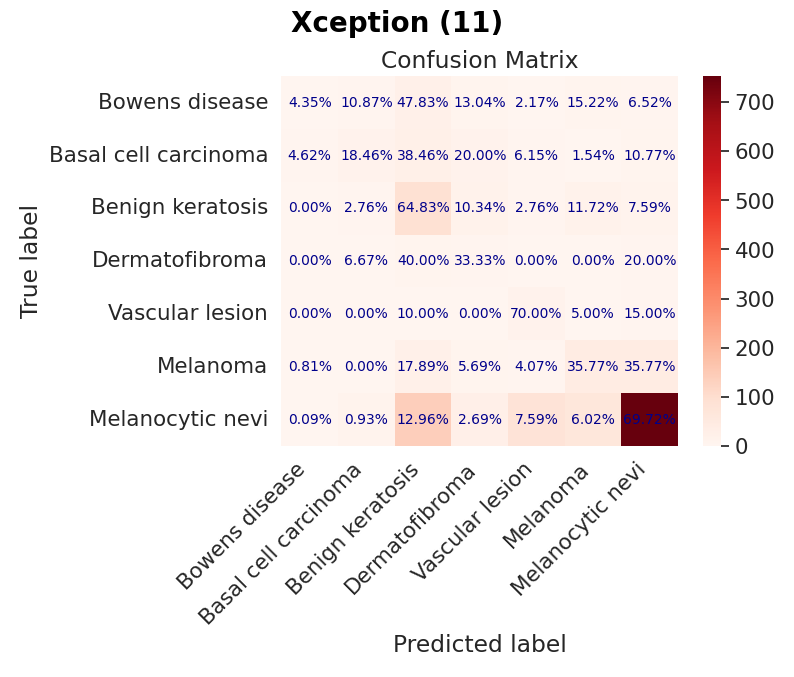

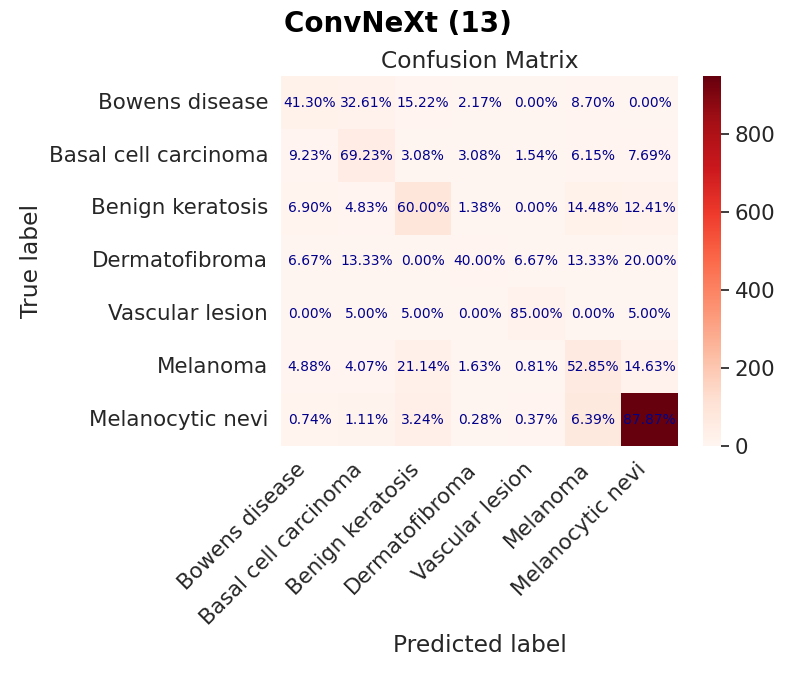

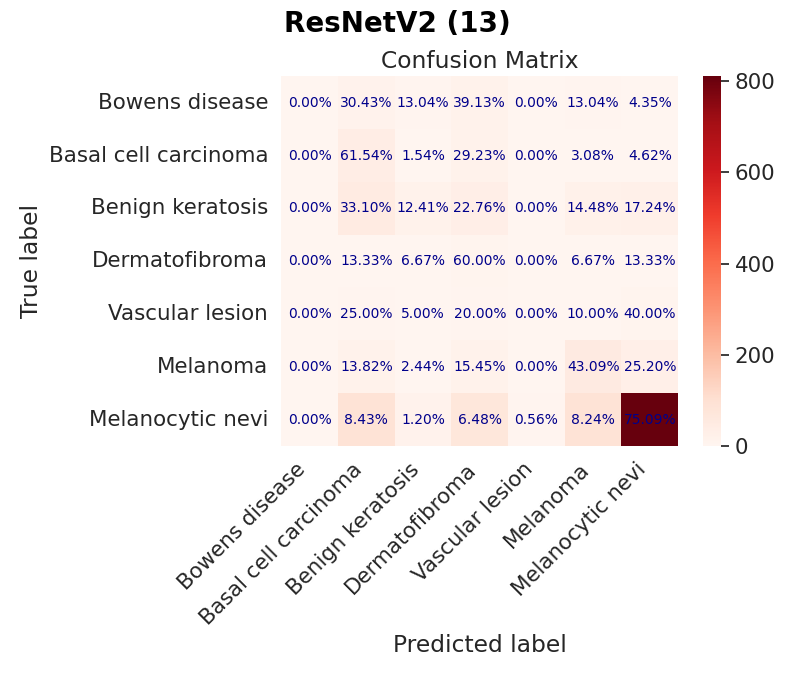

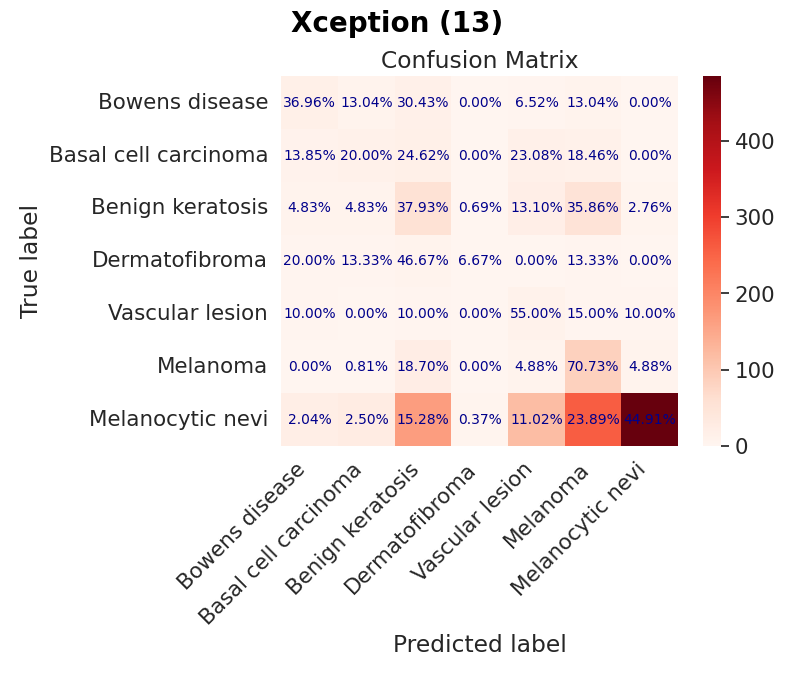

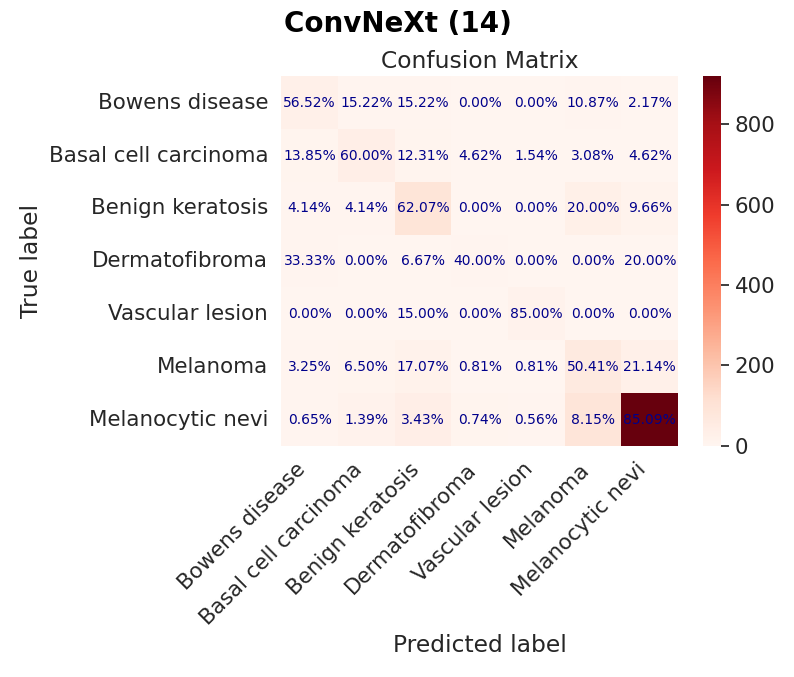

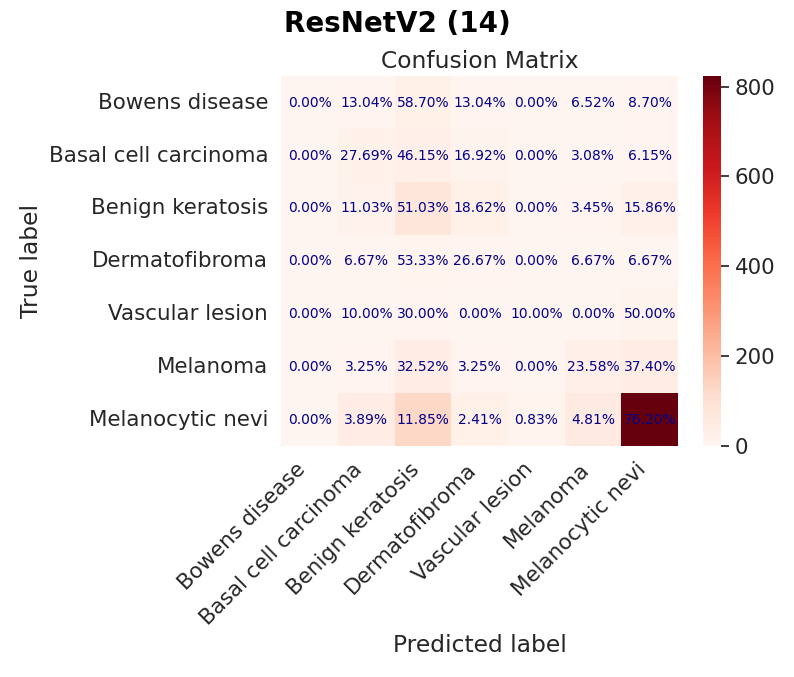

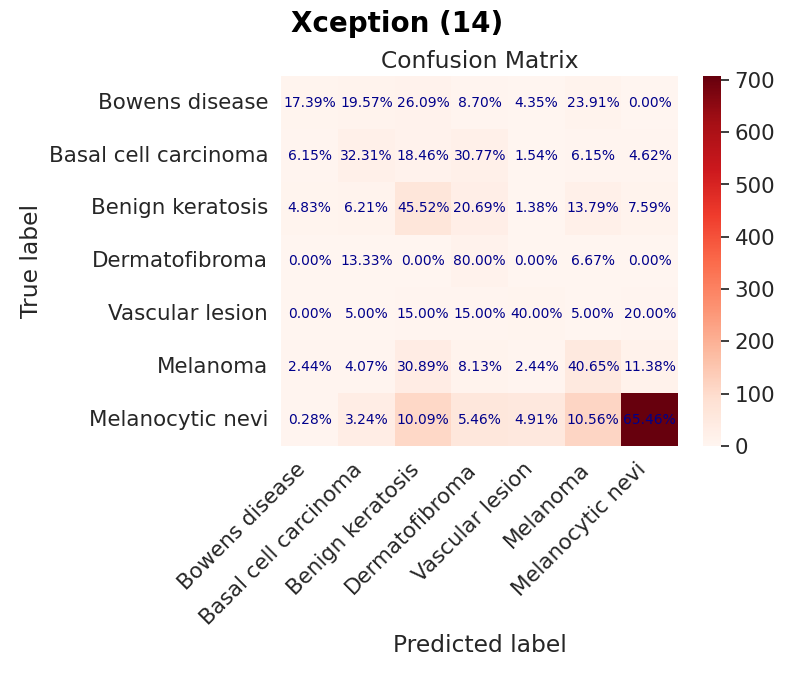

In [60]:
df = pd.read_sql_query("""
    select architecture, configuration_id, confusion_matrix from notebook WHERE configuration_id in (1,10,11,13,14)
""", connection)
for id, row in df.iterrows():
    displayImage(row,"confusion_matrix")

# Closing db connection

In [61]:
connection.close()